# Electronics Demos


See also some of the circuit diagram demos in the *3.2.0 Generating Embedded Diagrams.ipynb* notebook.

This notebook demonstrates how we can use a range of techniques to script the creation of electrical circuit diagrams, as well as creating models of circuits that can be rendered as a schematic circuit diagram and analysed as a computational model. This means we can:

- create a model of a circuit as a computational object through a simple description language;
- render a schematic diagram of the circuit from the model;
- display analytic equations describing the model that represent particular quantities such as currents and voltages as a function of component variables;
- automatically calculate the values of voltages and currents from the model based on provided component values.

The resulting document is self-standing in terms of creating the media assets that are displayed from within the document itself. In addition, analytic treatments and exact calculations can be performed on the same model, which means that diagrams, analyses and calculations will always be consistent, automatically derived as they are from the same source. This compares to a traditional production route where the different components of the document may be created independently of each other.

A full treatment would require a notebook environment with various notebook extensions enabled so that things like code cells could be hidden, or generated equations and diagrams could be embedded directly in markdown cells.

Cells could also be annotated with metadata identifying them as cells to be used in a slideshow/presentation style view using the RISE notebook extension. (*You could do this yourself now, it's just taking me some time working through all the things that are possible and actually marking the notebook up!*)

## `lcapy`

`lcapy` is a linear circuit analysis package that can be used to describe, display and analyse the behaviour of a wide range of linear analogue electrical circuits.

The *3.2.0 Generating Embedded Diagrams.ipynb*  notebook demonstrates how electrical circuit diagrams can be written using the `circuitikz` *TeX* package. Among other things, `lcapy` can generate circuit diagrams using `circuitikz` scripts generated from a simpler Python grammar.

`lcapy` provides a far more powerful approach, by using a circuit description that can be used to generate an circuit diagram as the basis for a wide range of analyses. For example, `lcapy` can be used to describe equivalent circuits (such as Thevenin or Norton equivalent circuits), or generate Bode plots.

*There are some further examples not yet featuring in these Azure notebooks linked to from [An Easier Approach to Electrical Circuit Diagram Generation – lcapy](https://blog.ouseful.info/2018/08/07/an-easier-approach-to-electrical-circuit-diagram-generation-lcapy/).*

In [2]:
%%capture
try:
    %load_ext tikz_magic
except:
    !conda config --add channels conda-forge
    !conda install -y imagemagick
    !pip install --user git+https://github.com/innovationOUtside/ipython_magic_tikz

In [3]:
%%capture
try:
    import lcapy
except:
    !pip install git+https://github.com/mph-/lcapy.git

Let's see how far we can get doing a simple re-representation of an OpenLearn module on electronics.

## OpenLearn Example

*The following section is a reworking of http://www.open.edu/openlearn/science-maths-technology/introduction-electronics/content-section-3.1 .*

In [4]:
import lcapy
from lcapy import Circuit

from IPython.display import display, Latex
%matplotlib inline

### Voltage dividers
Voltage dividers are widely used in electronic circuits to create a reference voltage, or to reduce the amplitude of a signal. The figure below shows a voltage divider. The value of $V_{out}$ can be calculated from the values of $V_S$, $R_1$ and $R_2$.

In [5]:
#We can create a schematic for the voltage divider using lcapy
#This has the advantage that circuit description is also a model 
#The model can be analysed and used to calculate voltages and currents, for example,
#  across components if component values and the source voltage are defined

#Figure:  A voltage divider circuit
sch='''
VS 1 0 ; down
W 1 2 ;  right, size=2
R1 2 3 ; down
R2 3 4; down
W 3 5; right
P1 5 6; down,v=V_{out}
W 4 6; right
W 4 0; left
'''

#Demonstrate thate we can write the descriptioon to a file 
fn="voltageDivider.sch"
with open(fn, "w") as text_file:
    text_file.write(sch)

#  and then create the circuit model from the (persisted) file    
cct = Circuit(fn)

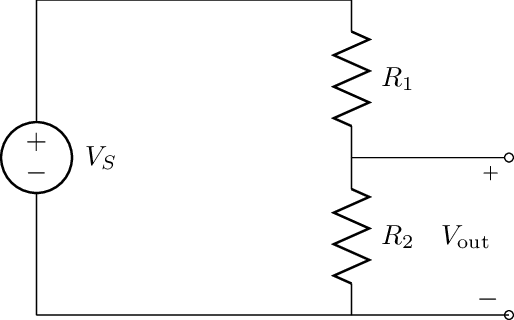

In [6]:
#Draw the circuit diagram that corresponds to the schematic description
cct.draw(style='american', draw_nodes=False, label_nodes=False) #american, british, european
#Draw function is defined in https://github.com/mph-/lcapy/blob/master/lcapy/schematic.py
#The styles need tweaking to suit OU convention - this requires a minor patch to lcapy
#Styles defined in https://github.com/mph-/lcapy/blob/master/lcapy/schematic.py#Schematic.tikz_draw

In the first instance, let’s assume that  is not connected to anything (for voltage dividers it is always assumed that negligible current flows through ). This means that, according to Kirchhoff’s first law, the current flowing through  is the same as the current flowing through . Ohm’s law allows you to calculate the current through . It is the potential difference across that resistor, divided by its resistance. Since the voltage  is distributed over two resistors, the potential drop over $R_1$ is $V_{R_1}=V_S - V_{out}$.

In [7]:
#The equation at the end of the last paragraph is written explicitly as LateX
# But we can also analyse the circuit using lcapy to see what the equation *should* be

#The voltage across R_2, V_out, is given as:
cct.R1.v
#We can't do anything about the order of the variables in the output expression, unfortunately
#It would be neater if sympy sorted fractional terms last but it doesn't...

#We can get an expression for the output voltage, Vout, or its calculated value in a couple of ways:
#- find the voltage across the appropriately numbered nodes
#  (the node numbers can be displayed on the schematic if required:
#   simply set label_nodes=True in the draw() statement.)
cct.Voc(3,4)['t']
#- the output voltage can also be obtained by direct reference to the appropriate component:
cct.R2.v

#sympy is a symbolic maths package
from sympy import Symbol, Eq
#If we add .expr to the voltages, we can get the sympy representation of voltage and current equations
# that are automatically derived from the model.
vout_expr=cct.R2.v.expr
v_r1_expr=cct.R1.v.expr

#I don't know how to get the symbols from the circuit as sympy symbols so create them explicitly
vout=Symbol('V_out')
v_r1=Symbol("V_{R_1}")

#Working with sympy symbols, we can perform a substitution if expressions match exactly
#In this case, we can swap in V_out for the expression returned from the analysis
#  to give us an expression in the form we want
Eq( v_r1, v_r1_expr.subs(vout_expr,vout) )
#This is rendered below - and created through symbolic maths analysis of the circuit model.

*The following expressions are hand written using LaTeX*

The current through $R_1$ ($I_{R_1}$) is given by

$I_{R_1}=\displaystyle\frac{(V_S-V_{out})}{R_1}$ 

Similarly, the current through $R_2$ is given by

$I_{R_2}=\displaystyle\frac{V_{out}}{R_2}$ 

Kirchoff’s first law tells you that $I_{R_1}=I_{R_2}=$, and therefore

$\displaystyle\frac{V_{out}}{V_{R_2}}=\frac{(V_S-V_{out})}{R_1}$ 

Multiplying both sides by $R_1$ and by $R_2$ gives

$R_1V_{out}=R_2(V_S-V_{out})$

Then multiplying out the brackets on the right-hand side gives

$R_1V_{out}=R_2V_S-R_2V_{out}$

This can be rearranged to

$R_1V_{out}+R_2V_{out}=R_2V_S$

giving

$(R_1+R_2)V_{out}=R_2V_S$

and therefore the fundamental result is obtained:

$V_{out}=\displaystyle\frac{R_2V_S}{(R_1+R_2)}$ 

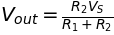

In [8]:
#We can find this from quantities we have derived through analysis of the presented circuit
Eq(vout,vout_expr)
#The following equation is automatically derived.
#Note that it could be embedded in the markdown cell if we enable the Python-Markdown notebook extension

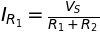

In [14]:
#It's not obvious how to get the same expression for each of the currents from sympy
#Could we force lcapy to use the V_out value somehow?
#sympy can be blocked from simplifying expressions using evaluate=False
# but I don't think we can pass this parameter using lcapy?
#In passing, the .expr rendering looks nicer in notebooks - does it use \displaystyle  on the fraction?
Eq(Symbol('I_{R_1}'),cct.R1.i.expr)
#The simplified version is correct but not very intuitive...
#And doesn't help the flow of the materials... but it might be useful later on?
#The following equation is generated by the symbolic analysis...

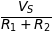

In [15]:
#We get the following from the circuit analysis, as above...
cct.R2.i.expr
#We note that the circuit analysis returns equal expressions for I_R_1 and I_R_2
#  which gives some sort of reinforcement to the idea of Kirchoff's Law...
#The following equation is generated by the symbolic analysis...

#### Exercise
Suppose  $V_S= 24 V$ and $R_2 = 100\Omega$. You want $V_{out} = 6 V$. What value of $R_1$ do you need?

#### Answer
Rearranging the equation for $V_{out}$ gives

$V_{out}(R_1+R_2)=R_2V_S$

and therefore

$(R_1+R_2)=\displaystyle\frac{R_2V_S}{V_{out}}$

which means the equation for $R_1$ is

$R_1=\displaystyle\frac{R_2V_S}{V_{out}}-R_2$

Substituting in the values given,

$R_1=\displaystyle\frac{100\Omega \times 24V}{6V}-100\Omega = 400\Omega-100\Omega=300\Omega$

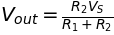

In [16]:
#We essentially want to solve the following
#Note that the expression is derived automatically from analysis of the circuit provided
Eq(vout,vout_expr)
#We don't necessarily know / can't control what the form of the present solution will be though?
#The following equation is generated by the symbolic analysis...

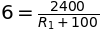

In [17]:
#Anyway... we can start to substitute values into the expression...
from sympy import sympify
#This is clunky - is there a proper way of substituting values into lcapy expressions?
Eq(6,sympify(str(vout_expr)).subs([('V_S',24), ('R_2',100)]))
#The following equation is generated by the symbolic analysis...

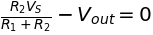

In [18]:
#Rearranging, we need to solve the following for R_1
Eq(vout_expr-vout,0)
#The following equation is generated by the symbolic analysis...

In [19]:
#sympy can solve such equations for us
from sympy import solve
#Solve for R_1 - this gives us an alternative form of the result above
Eq(Symbol('R_1'),solve(sympify(str(vout_expr-vout)),'R_1')[0])
#The following equation is generated by the symbolic analysis...

In [ ]:
#To solve the equation, we can substitute values into the sympy expression as follows
#solve(sympify(str(vout_expr-vout)).subs([('V_S',24), ('R_2',100),('V_out',6)]),'R_1')[0]

In [20]:
Eq(Symbol('R_1'),solve(sympify(str(vout_expr-vout)),'R_1')[0].subs([('V_S',24),
                                                                    ('R_2',100),
                                                                    ('V_out',6)]))
#A key point about this is that we can script in different component values and display the correct output
#We should be able to use the python-markdown extension to render py variables inside markdown cells
#  but the extension seems to be conflicting with something else in this notebook?
#If it was working, we should be able to write something like the following in a markdown cell:
#   For R_2={{R2=100;R2}}, V_S={{Vs=20;Vs}} and V_out={{Vout=5;Vout}},
#     we need R1={{solve( ..., 'R_1').subs([('V_S',Vs),('R_2',R2),('V_out',Vout)])}}.
#The following result is calculated by the symbolic analysis...

In [30]:
#We can also do partial solutions
Vs=20; Vout=5
R1=solve(sympify(str(vout_expr-vout)),'R_1')[0].subs([('V_S',Vs),('V_out',Vout)])

print('For V_S={Vs}V and V_out={Vout}V, we need R1={R1}.'.format(R2=R2,Vs=Vs,Vout=Vout,R1=R1))                                                                                                    

For V_S=20V and V_out=5V, we need R1=3*R_2.


In [14]:
#Alternatively, we can create a function to solve for any single missing value
#The following will calculate the relevant solution
def soln(values=None):
    if values is None:
        values={'V_S':24, 'R_1':'', 'R_2':100, 'V_out':6}
    outval=[v for v in values if not values[v]]
    invals=[(v,values[v]) for v in values if values[v] ]
    if len(outval)!=1 or len(invals)!=3:
        return 'oops'
    
    outval=outval[0]
    print(invals)
    return 'Value of {} is {}'.format(outval,
                                      solve(sympify(str(vout_expr-vout)).subs(invals),outval)[0])

In [15]:
soln()

[('V_out', 6), ('V_S', 24), ('R_2', 100)]


'Value of R_1 is 300'

In [16]:
soln({'V_S':24,'R_2':'', 'R_1':300,'V_out':6})

[('R_1', 300), ('V_out', 6), ('V_S', 24)]


'Value of R_2 is 100'

In [10]:
#We can also explore a simple thing to check the value from a circuit analysis
def cct1(V='24',R1='100',R2='100'):
    R1 = '' if R1 and float(R1) <=0 else R1
    sch='''
    VS 1 0 {V}; down
    W 1 2 ;  right, size=2
    R1 2 3 {R1}; down
    R2 3 4 {R2}; down
    W 3 5; right, size=2
    P1 5 6; down,v=V_{{out}}
    W 4 6; right, size=2
    W 4 0; left
    '''.format(V=V,R1=R1,R2=R2)
    
    cct = Circuit()
    cct.add(sch)
    cct.draw(label_nodes=False)
    
    #The output voltage, V_out is the voltage across R2
    txt='The output voltage, $V_{{out}}$ across $R_2$ is {}V.'.format(cct.R2.v if R1 else V)
    display(Latex(txt))
    return

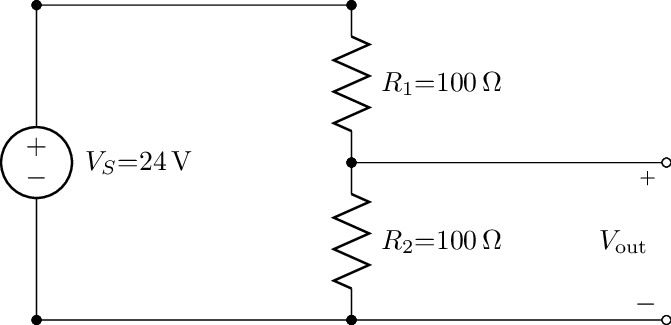

<IPython.core.display.Latex object>

In [39]:
cct1()

In [40]:
#It's trivial to make an interactive widget built around the previous function
#This then lets us select R and V values and calculate the result automatically
from ipywidgets import interact_manual

@interact_manual
def i_cct1(V='24',R1='',R2='100'):
    cct1(V=V,R1=R1,R2=R2)

interactive(children=(Text(value='24', description='V'), Text(value='', description='R1'), Text(value='100', d…

In [18]:
# We could also plot V_out vs R_1 for given V_S and R_2?

### The Wheatstone bridge

*http://www.open.edu/openlearn/science-maths-technology/introduction-electronics/content-section-3.2*

Originally developed in the nineteenth century, a Wheatstone bridge provided an accurate way of measuring resistances without being able to measure current or voltage values, but only being able to detect the presence or absence of a current. A simple galvanometer, as illustrated in the figure below, could show the absence of a current through the Wheatstone bridge in either direction. The long needle visible in the centre of the galvanometer would deflect to one side or the other if any current was detected, but show no deflection in the absence of a current.

![An early D'Arsonval galvanometer showing magnet and rotating coil (Wikipedia)](https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/A_moving_coil_galvanometer._Wellcome_M0016397.jpg/272px-A_moving_coil_galvanometer._Wellcome_M0016397.jpg)
*An early D'Arsonval galvanometer showing magnet and rotating coil ([Wikipedia](https://commons.wikimedia.org/wiki/File:A_moving_coil_galvanometer._Wellcome_M0016397.jpg))*

The figures below shows two equivalent circuits made of four resistors forming a Wheatstone bridge. Its purpose here is to show whether there is any current flowing between $V_{left}$ and  $V_{right}$.

In [37]:
%load_ext tikz_magic

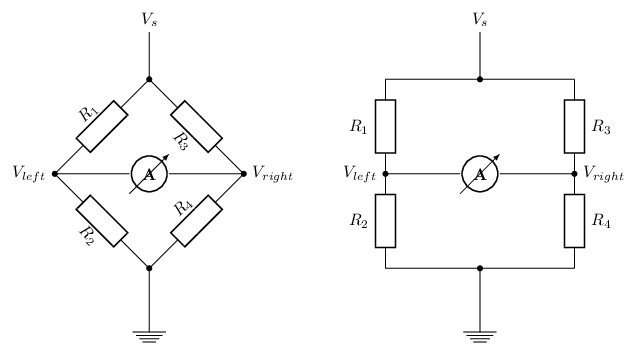

In [38]:
%%tikz -p circuitikz -s 0.4
%The following creates two diagrams side by side

%The script could be improved by specifying some parameters to identify component sizes
%  and calculate node locations relatively.

%Select the resistor style
\ctikzset{resistor = european}

%Create the left hand diagram
  \draw  (0,1) to[R, l=$R_2$] (-2,3) to[R, l=$R_1$] (0,5) -- (0,6);
%can't get the R_2 and R_4 labels onto the other side of the resistor?
  \draw  (0,1) to[R, l=$R_4$] (2,3) to[R, l=$R_3$] (0,5);
\draw(-2,3)to[ammeter] (2,3);
\draw (0,1) to (0,0) node[ground]{};
\draw (0,6) node[above] {$V_s$};
\node[circle,draw=black, fill=black, inner sep=0pt,minimum size=3pt,label=left:{$V_{left}$}] (vl2) at (-2,3) {};
\node[circle,draw=black, fill=black, inner sep=0pt,minimum size=3pt,label=right:{$V_{right}$}] (vr2) at (2,3) {};
\node[circle,draw=black, fill=black, inner sep=0pt,minimum size=3pt,label=right:{}] (g) at (0,1) {};
\node[circle,draw=black, fill=black, inner sep=0pt,minimum size=3pt,label=right:{}] (g) at (0,5) {};

%Create the right hand diagram
\begin{scope}[xshift=7cm]
  \draw (0,1)--(-2,1) to[R, l=$R_2$] (-2,3) to[R, l=$R_1$] (-2,5) -- (0,5)--(0,6);
  \draw  (0,1)--(2,1) to[R, l_=$R_4$] (2,3) to[R, l_=$R_3$] (2,5)--(0,5);
\draw (0,1) to (0,0) node[ground]{};
\draw(-2,3)to[ammeter] (2,3);
\draw (0,6) node[above] {$V_s$};
\node[circle,draw=black, fill=black, inner sep=0pt,minimum size=3pt,label=left:{$V_{left}$}] (vl2) at (-2,3) {};
\node[circle,draw=black, fill=black, inner sep=0pt,minimum size=3pt,label=right:{$V_{right}$}] (vr2) at (2,3) {};
\node[circle,draw=black, fill=black, inner sep=0pt,minimum size=3pt,label=right:{}] (g2) at (0,1) {};
\node[circle,draw=black, fill=black, inner sep=0pt,minimum size=3pt,label=right:{}] (g) at (0,5) {};
\end{scope}

The bridge is said to be balanced (that is, no current flows through the bridge and the needle of the galvanometer shows no deflection) if the voltages $V_{left}$ and $V_{right}$ are equal.

It can be shown that the bridge is balanced if, and only if, $\frac{R_1}{R_2}=\frac{R_3}{R_4}$, as follows.

When $V_{left}-V_{right}=0$ then $V_{left}=V_{right}$. Then the Wheatstone bridge can be viewed as two voltage dividers, $R_1$ and $R_2$ on the left and $R_3$ and $R_4$ on the right. Applying the voltage divider equation gives $V_{left}=\frac{R_2}{(R_1+R_2)}V_S$ and $V_{right}=\frac{R_4}{(R_3+R_4)}V_S$.

So

$\displaystyle\frac{R_2}{(R_1+R_2)}=\frac{R_4}{(R_3+R_4)}$

and

$R_2(R_3+R_4)=R_4(R_1+R_2)$

Multiplying out the brackets gives

$R_2R_3+R_2R_4=R_4R_1+R_4R_2$

which simplifies to

$R_2R_3=R_4R_1$

and

$\displaystyle\frac{R_3}{R_4}=\frac{R_1}{R_2}$

So, if $R_4$ were unknown, $R_1$, $R_2$ and $R_3$ could be chosen so that the needle of a galvanometer showed no deflection due to the current. Then

$R_4=\displaystyle\frac{R_2 \times R_3}{R_1}$

In [21]:
#We can actually demonstrate the current flow with some lcapy analysed examples
#We can get an indication of the sign of the current across the ammeter in the following way
from numpy import sign
sign(-1),sign(0),sign(1)

(-1, 0, 1)

In [2]:
%%capture
#This package lets us work with SI units, suitably quantified
!pip install quantiphy

In [45]:
#Define a function that creates - and analyses - a Wheatstone bridge circuit
#We'll model the ammeter as a low value resistor
from quantiphy import Quantity
def wheatstone(R1=10,R2=10, R3=1e6,R4=1e6, diag=True):
    sch='''
    W 1 0; down
    W 1 2;  left
    R2 2 3 {R2}; up
    R1 3 4 {R1}; up
    W 4 5; right
    W 1 6;  right
    R4 6 7 {R4}; up
    R3 7 8 {R3}; up
    W 8 5; left
    RA 7 3 1e-6; left
    V 9 5 dc 10; down
    W 9 10; right, size=3
    RL 10 11 1e6; down
    W 11 0; left, size=3
    '''.format(R1=R1,R2=R2,R3=R3,R4=R4)
    #We model the ammeter as a low value resistor

    _cctw = Circuit()
    _cctw.add(sch)
    
    if diag:
        _cctw.draw(label_nodes=False, draw_nodes=False, style='european')
    
    def _qR(R):
        return '$'+Quantity(R, '\Omega').render()+'$'
    display(Latex('Resistor values: R1: {}, R2: {}, R3: {}, R4:{}'.format(_qR(R1),_qR(R2),_qR(R3),_qR(R4))))
    display(Latex('$\\frac{{R1}}{{R2}}$ = {}, $\\frac{{R3}}{{R4}}$ = {}'.format(R1/R2,R3/R4)))
    signer = '=' if (R1/R2)==(R3/R4) else '<' if (R1/R2)<(R3/R4) else '>'
    display(Latex('$\\frac{{R1}}{{R2}}$ {} $\\frac{{R3}}{{R4}}$'.format(signer)))
    display(Latex('Sign of current across $R_A$: {}'.format(sign(_cctw.RA.i.n(2)))))
    return _cctw

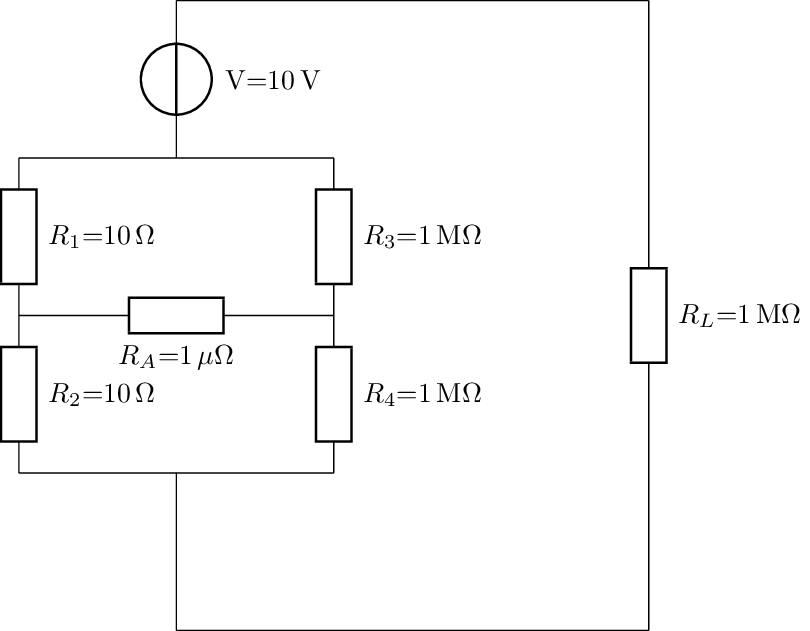

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [46]:
cctw=wheatstone()

In [28]:
wheatstone(R1=5,diag=False);
#The display breaks in nbpreview? The < is treated as an HTML open bracket maybe?

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [29]:
wheatstone(R3=5e5,diag=False);

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### FRAGMENTS - bits and pieces I've found out along the way that may be useful later

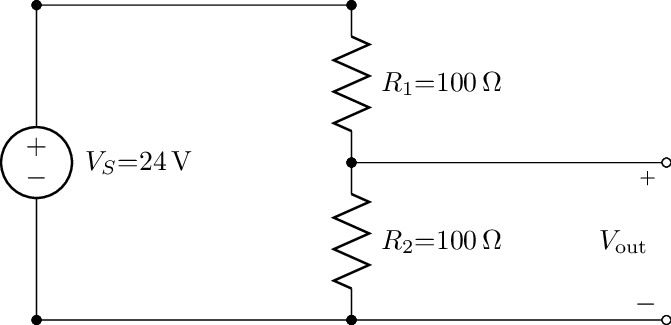

<IPython.core.display.Latex object>

In [11]:
#It's easy enough to pass in values to a defined circuit and calculate a desired componebnt value
#This means we can let students check their own answers...
#The following renders the circuit with specified component values and then calucates and displays V_out
#This approach can also be used to generate assessment material 
# for activities that take the same form year on year, for example, but use different values.
#The wrapper function could also be extended to allow users to enter 3 of 4 values and calculate the fourth.
cctx=cct1(V=24,R2=100,R1=100)


##### Example of a step response

Different inputs can be applied to a circuit - which means we can use a step input, for example, and then analyse / calculate the step response.

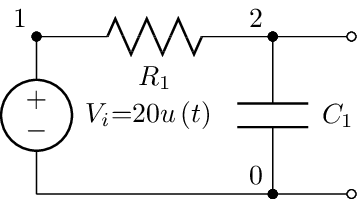

In [63]:
from lcapy import Circuit, j, omega

cct = Circuit()
cct.add("""
Vi 1 0_1 step 20; down
R1 1 2; right, size=1.5
C1 2 0; down
W 0_1 0; right
W 0 0_2; right, size=0.5
P1 2_2 0_2; down
W 2 2_2;right, size=0.5""")

cct.draw()

In [64]:
cct.C1.v

⎛          -t  ⎞             
⎜         ─────⎟             
⎜         C₁⋅R₁⎟             
⎝20 - 20⋅ℯ     ⎠⋅Heaviside(t)

In [38]:
cctx.R2.v

12

In [65]:
cct.C1.i

     -t               
    ─────             
    C₁⋅R₁             
20⋅ℯ     ⋅Heaviside(t)
──────────────────────
          R₁          

In [66]:
cct.R1.I.s

      20      
──────────────
   ⎛      1  ⎞
R₁⋅⎜s + ─────⎟
   ⎝    C₁⋅R₁⎠

In [67]:
#s-domain voltage across R1
cct.R1.V.s

      2   
  20⋅s    
──────────
        2 
 3     s  
s  + ─────
     C₁⋅R₁

In [68]:
#time domain voltage across R1
cct.R1.v

     -t               
    ─────             
    C₁⋅R₁             
20⋅ℯ     ⋅Heaviside(t)

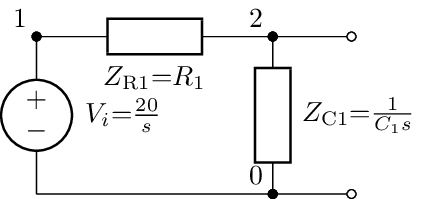

In [69]:
cct.s_model().draw()

In [70]:
#impedance between nodes 2 and 0
cct.impedance(2, 0)

      1       
──────────────
   ⎛      1  ⎞
C₁⋅⎜s + ─────⎟
   ⎝    C₁⋅R₁⎠

In [71]:
#open circuit vlotage between nodes 2 and 0
cct.Voc(2, 0).s

        20        
──────────────────
      ⎛ 2     s  ⎞
C₁⋅R₁⋅⎜s  + ─────⎟
      ⎝     C₁⋅R₁⎠

In [72]:
#equiv cct between nodes 2 and 0
cct.thevenin(2, 0)

V(        20        
──────────────────
      ⎛ 2     s  ⎞
C₁⋅R₁⋅⎜s  + ─────⎟
      ⎝     C₁⋅R₁⎠) + Z(      1       
──────────────
   ⎛      1  ⎞
C₁⋅⎜s + ─────⎟
   ⎝    C₁⋅R₁⎠)

In [73]:
cct.thevenin(2, 0).Z

      1       
──────────────
   ⎛      1  ⎞
C₁⋅⎜s + ─────⎟
   ⎝    C₁⋅R₁⎠

In [74]:
cct.thevenin(2, 0).Z.latex()

'\\frac{1}{C_{1} \\left(s + \\frac{1}{C_{1} R_{1}}\\right)}'

In [75]:
cct.thevenin(2, 0).Voc.s

        20        
──────────────────
      ⎛ 2     s  ⎞
C₁⋅R₁⋅⎜s  + ─────⎟
      ⎝     C₁⋅R₁⎠

In [76]:
cct.norton(2,0)

I( 20 
────
R₁⋅s) | Y(   ⎛      1  ⎞
C₁⋅⎜s + ─────⎟
   ⎝    C₁⋅R₁⎠)

In [77]:
cct.norton(2,0).Z

      1       
──────────────
   ⎛      1  ⎞
C₁⋅⎜s + ─────⎟
   ⎝    C₁⋅R₁⎠

In [78]:
#Y is reciprocal of Z
cct.norton(2,0).Y

   ⎛      1  ⎞
C₁⋅⎜s + ─────⎟
   ⎝    C₁⋅R₁⎠

In [79]:
cct.norton(2,0).Isc.s

 20 
────
R₁⋅s

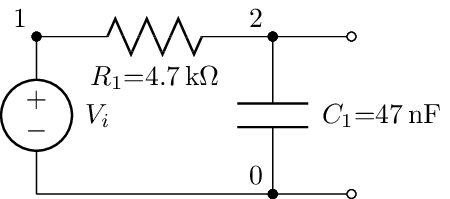

In [94]:
#Add component values 
from lcapy import Circuit
cct = Circuit()
cct.add("""
Vi 1 0_1 ; down
R1 1 2 4.7e3; right, size=1.5
C1 2 0 47e-9; down
W 0_1 0; right
W 0 0_2; right, size=0.5
P1 2_2 0_2; down
W 2 2_2;right, size=0.5""")

cct.draw()

In [95]:
cct.Voc(2,0).s

0

In [28]:
from lcapy import Vdc, R
c = Vdc(10)+R(100)

c.Voc.dc

10

In [25]:
c.Isc.dc

1/10

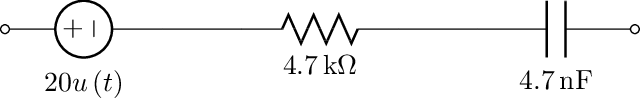

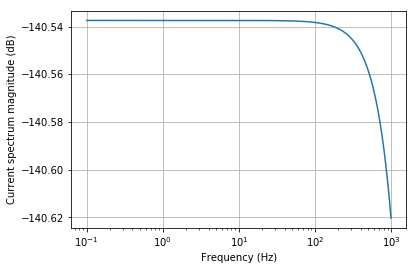

In [66]:
from numpy import logspace, linspace
from lcapy import  Vac, Vstep, R, C, L, sin, t, s , omega

n = Vstep(20) + R(4.7e3) + C(4.7e-9)
n.draw()

vf =logspace(-1, 3, 4000)
n.Isc.frequency_response().plot(vf, log_scale=True);


In [62]:
type(n)

lcapy.oneport.Ser

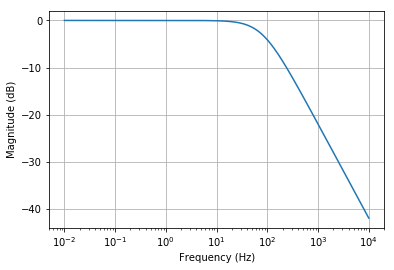

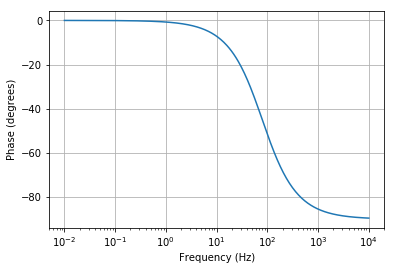

In [85]:
#Look like we can pass stuff in to the expression?
#so for a first order low pass filter eg https://web.stanford.edu/~boyd/ee102/conv_demo.pdf
X=(1/(1+s/500))(j * 2 * pi * f)
fv = logspace(-2, 4, 400)
X.plot(fv, log_scale=True)
X.phase_degrees.plot(fv,log_scale=True);

In [88]:
cct.Voc(2,0).s

      200000000       
──────────────────────
     ⎛ 2   10000000⋅s⎞
2209⋅⎜s  + ──────────⎟
     ⎝        2209   ⎠

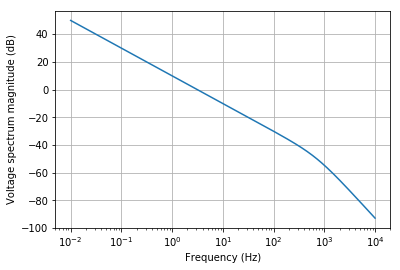

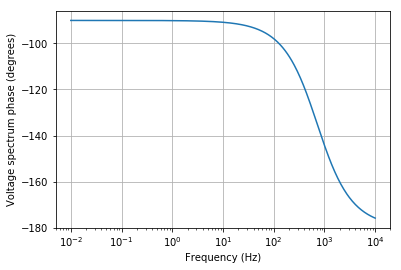

In [87]:
X=cct.Voc(2,0).s(j * 2 * pi * f)
fv = logspace(-2, 4, 400)
X.plot(fv, log_scale=True)
X.phase_degrees.plot(fv,log_scale=True);

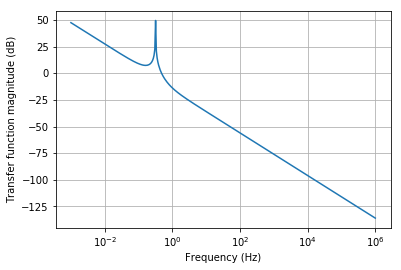

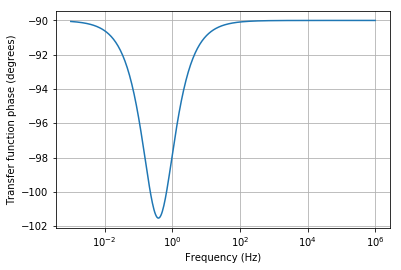

In [76]:
from numpy import logspace
from lcapy import pi, f, Hs, H, s, j

#HOw might we relate this to circuit description?
H = Hs((s - 2) * (s + 3) / (s * (s - 2 * j) * (s + 2 * j)))

A = H(j * 2 * pi * f)

fv = logspace(-3, 6, 400)
A.plot(fv, log_scale=True)
A.phase_degrees.plot(fv,log_scale=True);

In [77]:
A

   -j⋅(2⋅j⋅π⋅f - 2)⋅(2⋅j⋅π⋅f + 3)    
─────────────────────────────────────
2⋅π⋅f⋅(2⋅j⋅π⋅f - 2⋅j)⋅(2⋅j⋅π⋅f + 2⋅j)

In [46]:
H

   (s - 2)⋅(s + 3)   
─────────────────────
s⋅(s - 2⋅j)⋅(s + 2⋅j)

In [2]:
H = (cct.R1.V('s') / cct.Vi.V('s')).simplify()
H

  C₁⋅R₁⋅s  
───────────
C₁⋅R₁⋅s + 1

In [ ]:
##fragments

In [ ]:
#schemdraw https://cdelker.bitbucket.io/SchemDraw/SchemDraw.html

In [ ]:
#online examples - tangentially relevant as examples of what can be done elsewhere
#- https://www.circuitlab.com/
#- https://github.com/willymcallister/circuit-sandbox